# Árvores Multinomial II

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
# Carregando a base "X_train" completa

X_train = pd.read_csv('./input/X_train.csv')

# Exibe a quantidade de linhas e colunas
print(f'A quantidade de linhas: {X_train.shape}')

# Exibe as primeiras linhas da Series
print(X_train.head(1))

A quantidade de linhas: (7352, 564)
   Unnamed: 0  id_individuo  1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  \
0           0             1             0.288585            -0.020294   

   3 tBodyAcc-mean()-Z  4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  \
0            -0.132905           -0.995279           -0.983111   

   6 tBodyAcc-std()-Z  7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  ...  \
0           -0.913526           -0.995112           -0.983185  ...   

   553 fBodyBodyGyroJerkMag-skewness()  554 fBodyBodyGyroJerkMag-kurtosis()  \
0                            -0.298676                            -0.710304   

   555 angle(tBodyAccMean,gravity)  556 angle(tBodyAccJerkMean),gravityMean)  \
0                        -0.112754                                    0.0304   

   557 angle(tBodyGyroMean,gravityMean)  \
0                             -0.464761   

   558 angle(tBodyGyroJerkMean,gravityMean)  559 angle(X,gravityMean)  \
0                                 -0.018446                 -0.

In [4]:
print(X_train.columns)


Index(['Unnamed: 0', 'id_individuo', '1 tBodyAcc-mean()-X',
       '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z', '4 tBodyAcc-std()-X',
       '5 tBodyAcc-std()-Y', '6 tBodyAcc-std()-Z', '7 tBodyAcc-mad()-X',
       '8 tBodyAcc-mad()-Y',
       ...
       '553 fBodyBodyGyroJerkMag-skewness()',
       '554 fBodyBodyGyroJerkMag-kurtosis()',
       '555 angle(tBodyAccMean,gravity)',
       '556 angle(tBodyAccJerkMean),gravityMean)',
       '557 angle(tBodyGyroMean,gravityMean)',
       '558 angle(tBodyGyroJerkMean,gravityMean)', '559 angle(X,gravityMean)',
       '560 angle(Y,gravityMean)', '561 angle(Z,gravityMean)', 'id_atividade'],
      dtype='object', length=564)


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [6]:
# dividir base em treino e validação

X_train, X_valid = train_test_split(X_train, test_size=0.25, random_state=42)



In [9]:
# conferindo a divisão da base

print('X_train: ', X_train.shape[0], 'linhas')
print('X_valid: ', X_valid.shape[0], 'linhas')

X_train:  2947 linhas
X_valid:  737 linhas


In [12]:
# carregar os dados de de dataframe que contém apenas 3 variáveis, ou seja, "X_train_subset"

X_train_subset = pd.read_csv('./input/X_train_subset.csv')
X = X_train_subset.drop(columns=['id_atividade'])
y = X_train_subset['id_atividade']

X_train, X_test, y_train, y_test = train_test_split(X, y)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [27]:
# árvore feita na base de treino com profundidade 4

clf = DecisionTreeClassifier(max_depth=4)

# Treinar o modelo
clf.fit(X, y)

# Obter a importância das variáveis
importances = clf.feature_importances_

# Criar um DataFrame para visualizar a importância das variáveis
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Ordenar as variáveis por importância em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir as 3 variáveis com maior importância
print("As 3 variáveis com maior importância:")
print(feature_importance_df.head(3))

As 3 variáveis com maior importância:
               Feature  Importance
2  1 tBodyAcc-mean()-X    0.664136
3  2 tBodyAcc-mean()-Y    0.241343
4  3 tBodyAcc-mean()-Z    0.094521


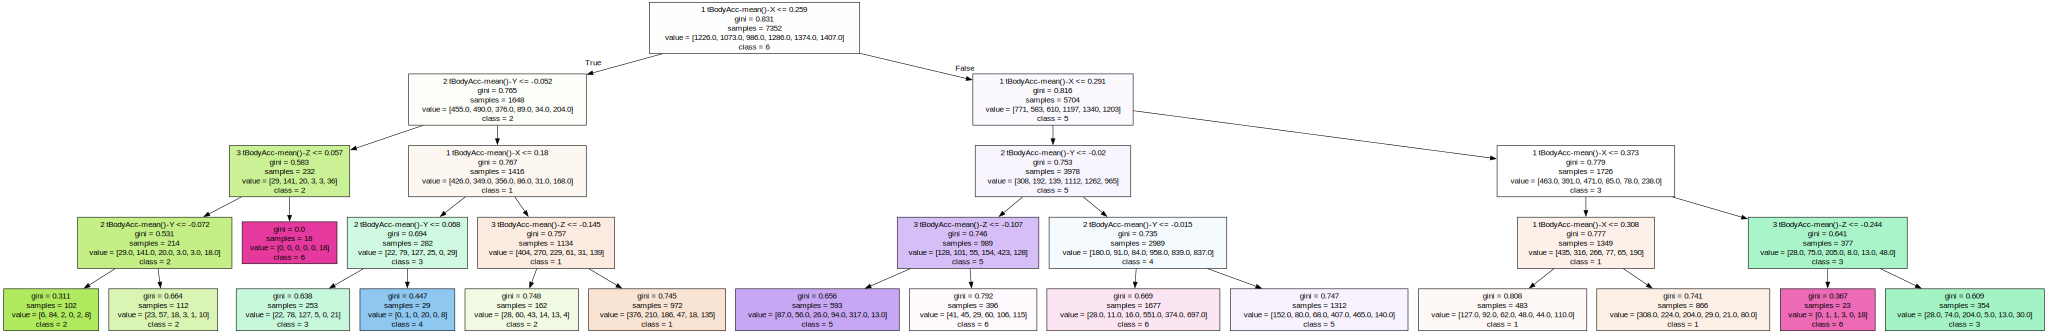

In [28]:
# instalar o programa -- https://graphviz.org/download/ --
# optar por adicionar a variável de ambiente no PATH do Windows
# pip install graphviz

import graphviz
from sklearn.tree import export_graphviz
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['1', '2', '3', '4', '5', '6'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

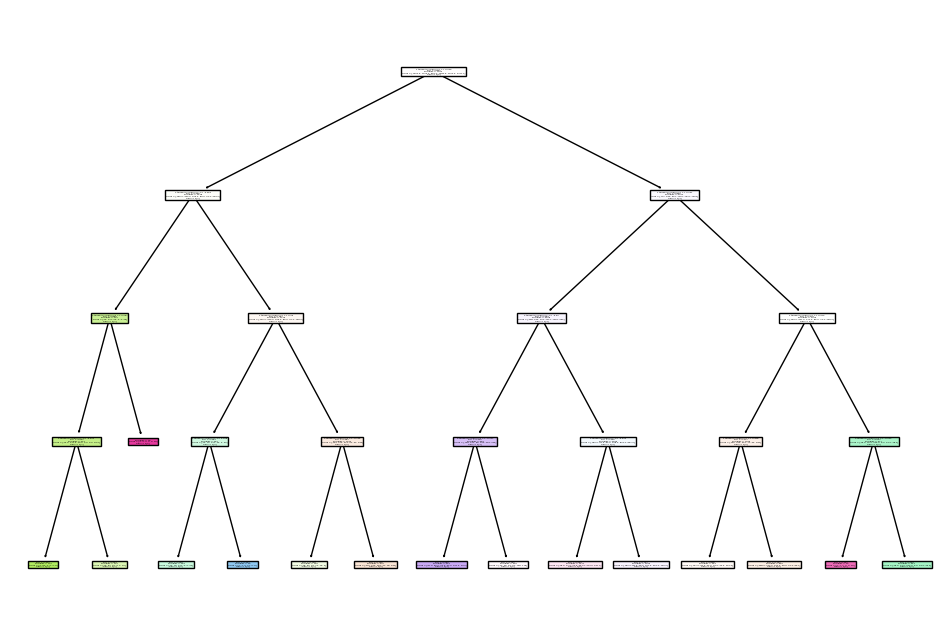

Melhor ccp_alpha encontrado: 0.0


In [34]:


# Selecionar as três variáveis com maior importância
top_3_features = ["1 tBodyAcc-mean()-X", "2 tBodyAcc-mean()-Y", "3 tBodyAcc-mean()-Z"]

# Filtrar o conjunto de dados apenas com as três variáveis selecionadas
X_top3 = X[top_3_features]

# Inicializar uma lista para armazenar as médias das pontuações de validação cruzada
mean_scores = []

# Testar diferentes valores de ccp_alpha
ccp_alphas = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]  # Defina os valores de ccp_alpha a serem testados
for ccp_alpha in ccp_alphas:
    # Inicializar o classificador da árvore de decisão com o ccp_alpha atual
    clf = DecisionTreeClassifier(max_depth=4, ccp_alpha=ccp_alpha, random_state=42)
    
    # Calcular as pontuações de validação cruzada para o modelo atual
    scores = cross_val_score(clf, X_top3, y, cv=5)
    
    # Calcular a média das pontuações de validação cruzada e armazenar na lista
    mean_score = scores.mean()
    mean_scores.append(mean_score)

# Encontrar o valor de ccp_alpha que maximiza a média das pontuações de validação cruzada
best_ccp_alpha = ccp_alphas[mean_scores.index(max(mean_scores))]

# Treinar a árvore de decisão com as três variáveis selecionadas e o melhor ccp_alpha encontrado
best_clf = DecisionTreeClassifier(max_depth=4, ccp_alpha=best_ccp_alpha, random_state=42)
best_clf.fit(X_top3, y)

# Visualizar a árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=top_3_features, class_names=True, filled=True)
plt.show()

print(f"Melhor ccp_alpha encontrado: {best_ccp_alpha}")

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

### Resposta

Comparando os dois modelos podemos afirmar que:

1) no primeiro modelo é usado o parâmetro "clf.feature_importances" que calcula a importância relativa das variáveis - uma em relação à outra;  foram utilizadas as três variáveis mais importantes;
2) no segundo modelo o critério para a construção da árvore foi a base de validação - "X_valid" e o melhor ccp alpha foi 0, ou seja, quanto maior o "ccp alpha" mais podas a árvore terá. No nosso caso, a melhor árvore é aquela que não terá poda.
